# Exploration de la station RATP Roosevelt

#### Ce notebook a comme but l'exploration des données de qualité de l'air et météo de la station Rooselvelt fournies par la RATP

A la fin de cette exploration, nous pourrons aussi sortir une liste de toutes les anomalies trouvés ou tous les élements dont il faudra prendre une décision. 

## Libraries à importer

In [2]:
library("IRdisplay") #used to show png file 
library("tidyverse")

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::

## Variables globales

In [3]:
DATA_PATH="C://Formation IA//CEPE//Projet//QAIR//Data//"
DATA_FILE="RATP_qair_2013_2020.csv"

## Lecture des données

D'abord, nous allons récupérer les données que nous avions téléchargée à travers de JSON

In [4]:
fichier_donnees=paste(DATA_PATH,DATA_FILE,sep="")
df<-read.csv(fichier_donnees)

bien lu?

In [5]:
df

X,X10fra1,dateheure,tfra1,n2fra1,hyfra1,nofra1,c2fra1
1,26,2013-01-01T01:00:00+00:00,15.1,41,65.6,23,612
2,18,2013-01-01T02:00:00+00:00,14.9,61,65.0,43,536
3,45,2013-01-01T03:00:00+00:00,14.9,52,63.3,22,490
4,22,2013-01-01T04:00:00+00:00,14.9,56,63.7,27,481
5,15,2013-01-01T05:00:00+00:00,15.0,57,63.3,27,464
6,17,2013-01-01T06:00:00+00:00,15.1,50,63.2,20,455
7,17,2013-01-01T07:00:00+00:00,14.9,51,63.7,24,442
8,20,2013-01-01T08:00:00+00:00,14.8,37,64.1,10,426
9,13,2013-01-01T09:00:00+00:00,14.5,40,64.0,11,427
10,7,2013-01-01T10:00:00+00:00,14.4,42,61.7,11,431


## Exploration des données

### Première exploration

A première vue

In [6]:
head(df)

X,X10fra1,dateheure,tfra1,n2fra1,hyfra1,nofra1,c2fra1
1,26,2013-01-01T01:00:00+00:00,15.1,41,65.6,23,612
2,18,2013-01-01T02:00:00+00:00,14.9,61,65.0,43,536
3,45,2013-01-01T03:00:00+00:00,14.9,52,63.3,22,490
4,22,2013-01-01T04:00:00+00:00,14.9,56,63.7,27,481
5,15,2013-01-01T05:00:00+00:00,15.0,57,63.3,27,464
6,17,2013-01-01T06:00:00+00:00,15.1,50,63.2,20,455


Nous observons que les nommes des colonnes ne semblent pas trop parlants, il faudra les renommer.

#### Validation des données

##### Nous pouvons comparer cette vue des données avec celle présentée au site : 

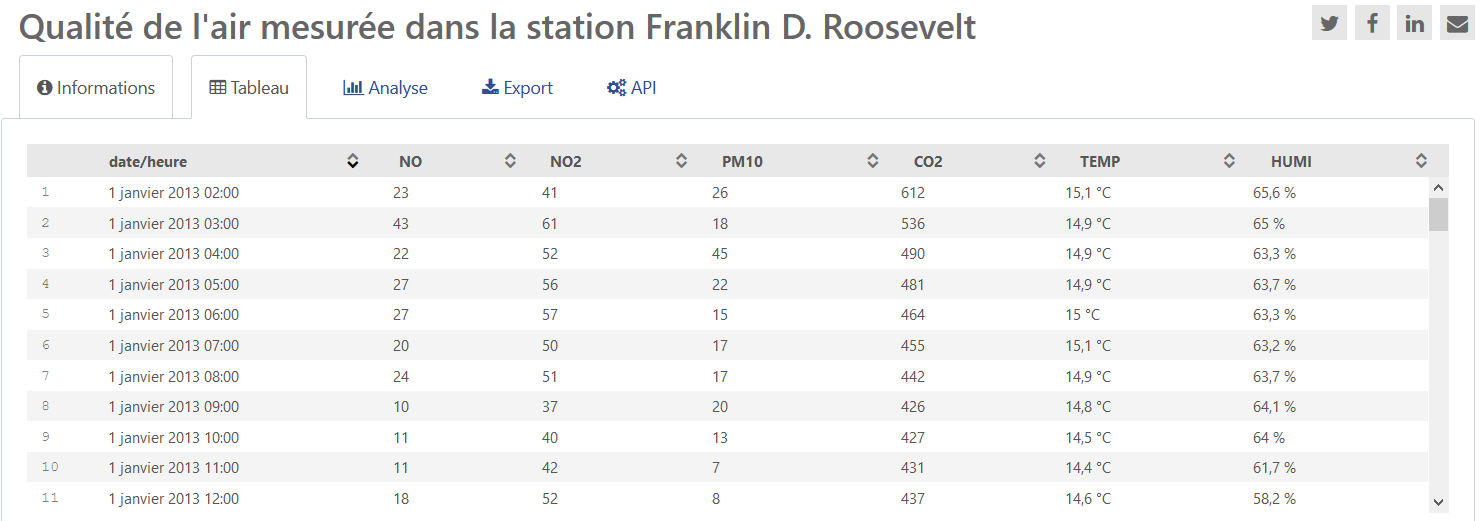

In [7]:
file_name_capture_RATP="capture RATP Roosevelt.PNG"
file_capture_RATP=paste(DATA_PATH,file_name_capture_RATP,sep="")
display_png(file=file_capture_RATP)  

Nous pouvons constater que le registre du 1/1/2013 01:00 du fichier JSON corresponde avec le registre du 1/1/2013 du 2:00 de la vue capturée. En plus dans le site du RATP les données commencent à partir du 2:00 AM du 1/1/2013 lorsque dans le fichier JSON il commencent à 01:00.

Comme nous avons aussi le csv directement récupéré du site, nous allons le comparer également : 

In [8]:
fichier_csv_site="download du site qualite-de-lair-mesuree-dans-la-station-franklin-d-roosevelt.csv"
fichier_donnees_site=paste(DATA_PATH,fichier_csv_site,sep="")
df_site<-read.csv(fichier_donnees_site,sep=";",header=FALSE)
head(df_site)

V1,V2,V3,V4,V5,V6,V7
2013-01-01T02:00:00+01:00,23,41,26,612,15.1,65.6
2013-01-01T03:00:00+01:00,43,61,18,536,14.9,65.0
2013-01-01T04:00:00+01:00,22,52,45,490,14.9,63.3
2013-01-01T05:00:00+01:00,27,56,22,481,14.9,63.7
2013-01-01T06:00:00+01:00,27,57,15,464,15.0,63.3
2013-01-01T07:00:00+01:00,20,50,17,455,15.1,63.2


** Le csv provennant du site semble correspondre à la capture, donc notre JSON fait un traitement avec les dates et heures qu'il faudra comprendre ou bien il faut peut être interpréter correctement les heures**

##### Toutes les variables attendues ?

Nous pouvons bien constater que dans dans les deux fichiers téléchargés et la capture d'écran nous avons la date-heure plus six variables qui correspondent à : C02, N02, NO, Particules fines, Température et humidité. 

##### Nombre de registres attendu ?

In [9]:
nrow(df)

[1] 69637

Selon la RATP nous devrions avoir : 

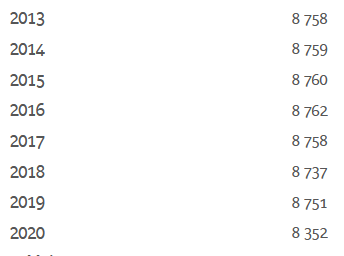

In [10]:
file_name_capture_RATP_nrow="Capture RATP nrow.PNG"
file_capture_RATP_nrow=paste(DATA_PATH,file_name_capture_RATP_nrow,sep="")
display_png(file=file_capture_RATP_nrow)  

Qui corresponde bien à notre numéro de lignes

In [11]:
8758+8759+8760+8762+8758+8737+8751+8352

[1] 69637

Regardons le nombre de registre par année dans notre dataset : 

In [12]:
table(df$dateheure %>% substr(1,4))


2013 2014 2015 2016 2017 2018 2019 2020 
8759 8759 8760 8761 8759 8736 8752 8351 

Ca ne corresponde pas tout à fait, certainement à cause des différences de critère des dates et heures.

##### Résumée des variables

In [13]:
summary(df)

       X            X10fra1                           dateheure    
 Min.   :    1   Min.   :  5.00   2019-10-27T02:00:00+00:00:    2  
 1st Qu.:17410   1st Qu.: 23.00   2013-01-01T01:00:00+00:00:    1  
 Median :34819   Median : 35.00   2013-01-01T02:00:00+00:00:    1  
 Mean   :34819   Mean   : 45.73   2013-01-01T03:00:00+00:00:    1  
 3rd Qu.:52228   3rd Qu.: 53.00   2013-01-01T04:00:00+00:00:    1  
 Max.   :69637   Max.   :979.00   2013-01-01T05:00:00+00:00:    1  
                 NA's   :3868     (Other)                  :69630  
     tfra1           n2fra1           hyfra1          nofra1      
 Min.   : 3.80   Min.   :  4.00   Min.   :13.10   Min.   :  1.00  
 1st Qu.:15.60   1st Qu.: 39.00   1st Qu.:40.70   1st Qu.: 10.00  
 Median :18.90   Median : 54.00   Median :47.60   Median : 23.00  
 Mean   :19.29   Mean   : 55.02   Mean   :47.79   Mean   : 37.42  
 3rd Qu.:23.10   3rd Qu.: 69.00   3rd Qu.:54.80   3rd Qu.: 49.00  
 Max.   :35.20   Max.   :265.00   Max.   :95.40   Max.

##### Données manquantes 

Il éxistent des données manquantes dans toutes les variables sauf la date-heure. Nous allons essayer de trouver où.

Nous créons une function afin de réaliser le traitment par toutes les colonnes un par un. 

In [14]:
join_all_na_columns<-function(dfaux,var_name)
{
    nulls_per_year_month<-table(df[is.na(df[var_name]),colnames(df)[3]] %>% substr(1,7))
    nulls_per_year_month<-data.frame(nulls_per_year_month)
    colnames(nulls_per_year_month)<-c("var",var_name)    
    df_joined<-merge(dfaux,nulls_per_year_month,by="var",all=TRUE)
    return (df_joined)
}

In [15]:
df_aux_empty<-data.frame(matrix(ncol = 1, nrow = 0))
colnames(df_aux_empty)<-c("var")
df_auxi<-df_aux_empty
for (col_var in colnames(df)[-c(1,3)])
{
    df_auxi<-join_all_na_columns(df_auxi,col_var)
}

In [16]:
df_auxi

var,X10fra1,tfra1,n2fra1,hyfra1,nofra1,c2fra1
2013-01,30,NA,16,NA,21,4
2013-02,9,NA,307,NA,313,83
2013-03,10,NA,267,NA,303,2
2013-04,8,1,429,1,469,4
2013-05,53,21,329,21,344,23
2013-06,338,324,326,324,334,334
2013-07,390,484,448,484,476,400
2013-08,88,NA,255,NA,266,191
2013-09,87,2,32,2,46,92
2013-10,9,NA,89,NA,96,67


On peut sortir l'information autrement

In [17]:
#This function will filter missing values, and show them numerically and in a plot
show_var_missing_values<-function(var_name,printTOrPlotF=TRUE)

{    
    nulls_per_year_month<-table(df[is.na(df[var_name]),colnames(df)[3]] %>% substr(1,7))
    #Aide4 : Il faut chosir une option parce que les deux ne marche pas
    if (printTOrPlotF==TRUE)
    {
        print(var_name)
        print(nulls_per_year_month)
    }
    else
    {
        plot(nulls_per_year_month,main=var_name,type="l")
    }
}

[1] "X10fra1"

2013-01 2013-02 2013-03 2013-04 2013-05 2013-06 2013-07 2013-08 2013-09 2013-10 
     30       9      10       8      53     338     390      88      87       9 
2013-11 2013-12 2014-01 2014-02 2014-03 2014-04 2014-05 2014-06 2014-07 2014-08 
     28      31       2      31       3       9       9      12      13      12 
2014-09 2014-10 2014-11 2014-12 2015-01 2015-02 2015-03 2015-04 2015-05 2015-06 
      5      12      11      21      17      11      18       8      89      26 
2015-07 2015-08 2015-09 2015-10 2015-11 2015-12 2016-01 2016-02 2016-03 2016-04 
     23      17      44      10      14       7      10      15      17      14 
2016-05 2016-06 2016-07 2016-08 2016-09 2016-10 2016-11 2016-12 2017-01 2017-02 
     14      17      24       7       9      26      21      12      16      31 
2017-03 2017-04 2017-05 2017-06 2017-07 2017-08 2017-09 2017-10 2017-11 2017-12 
     25      34      24      10      22     150      26      19      27      94 
2018-01 2018-

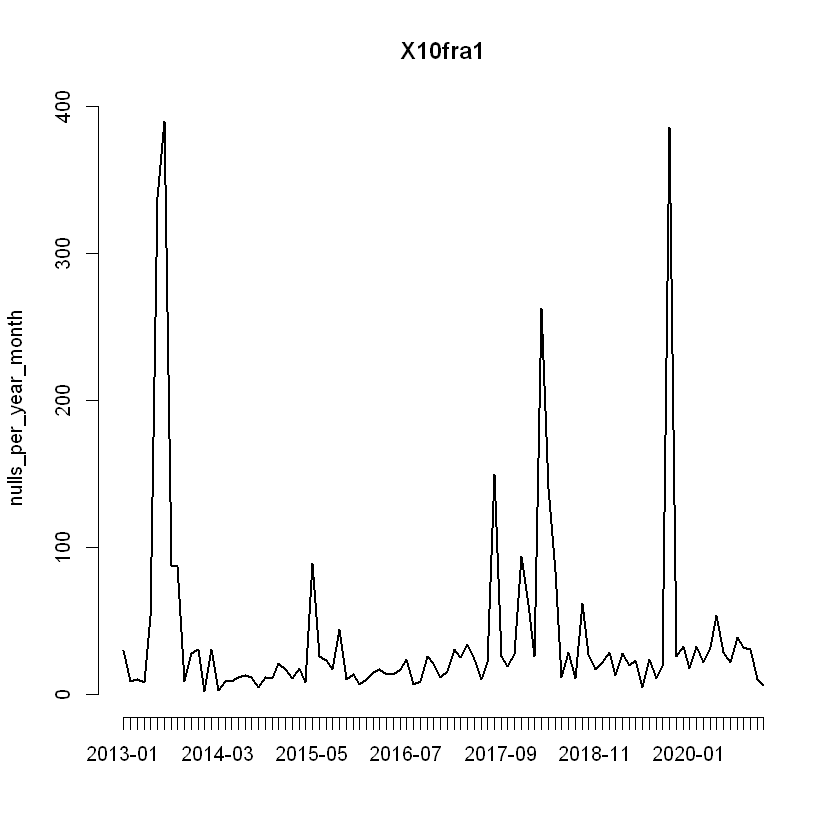

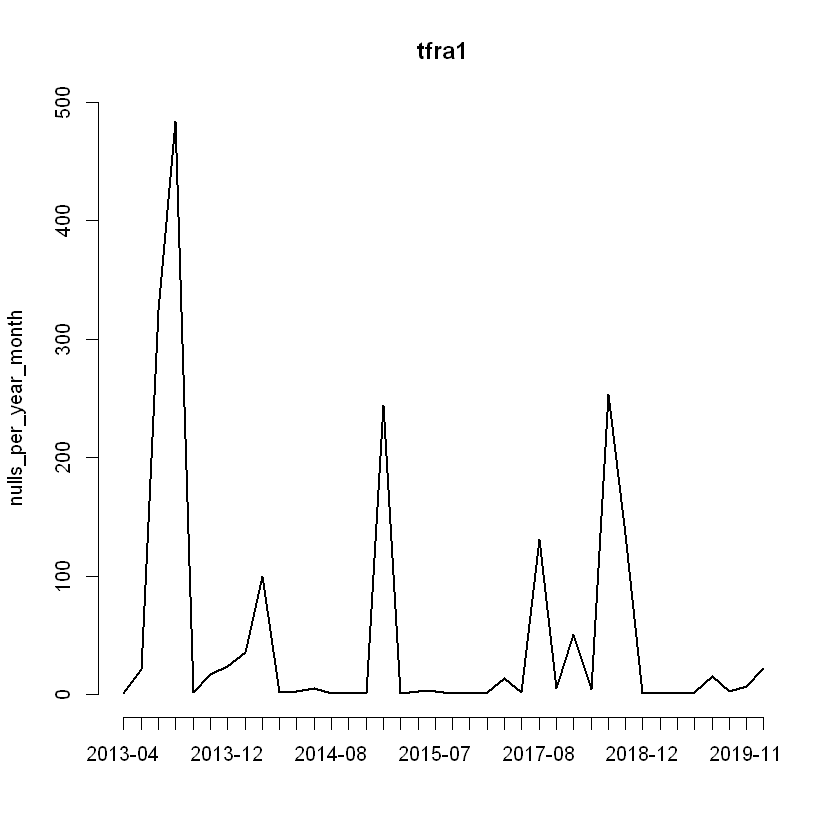

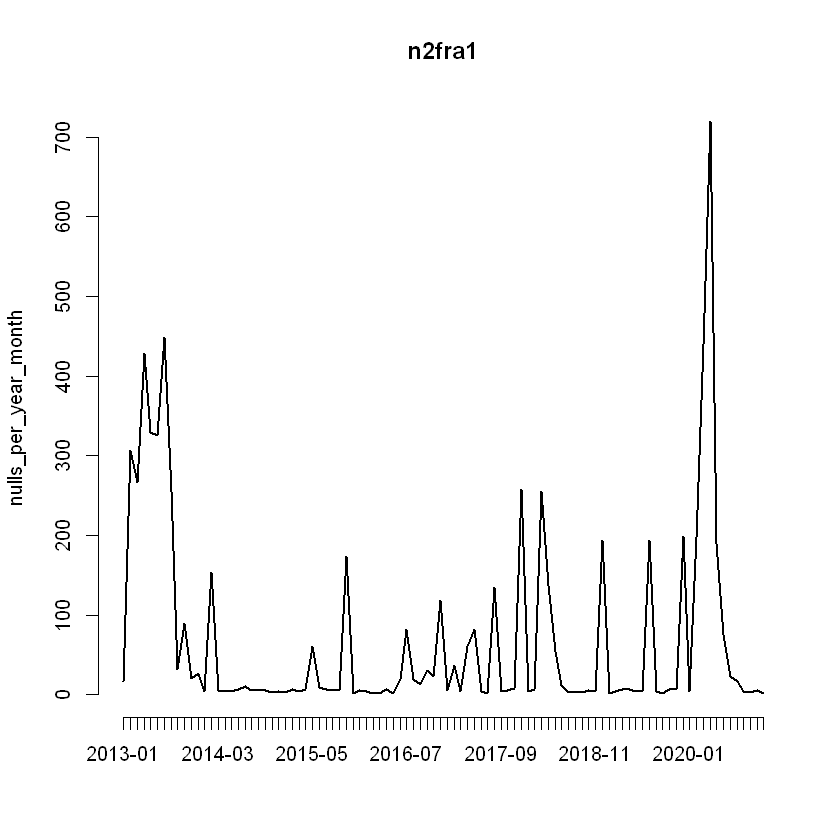

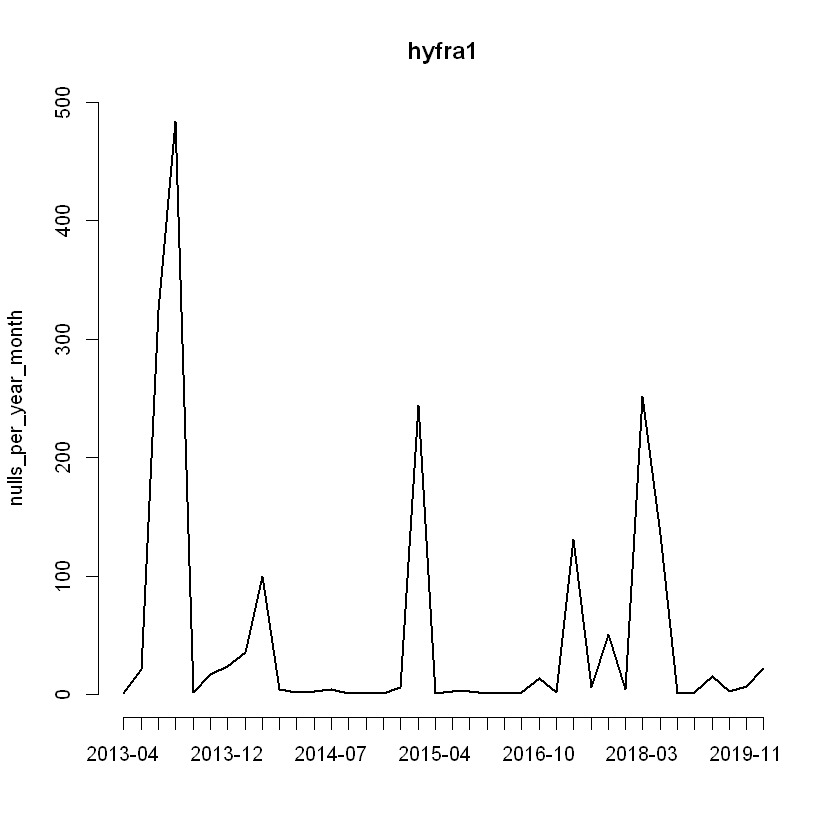

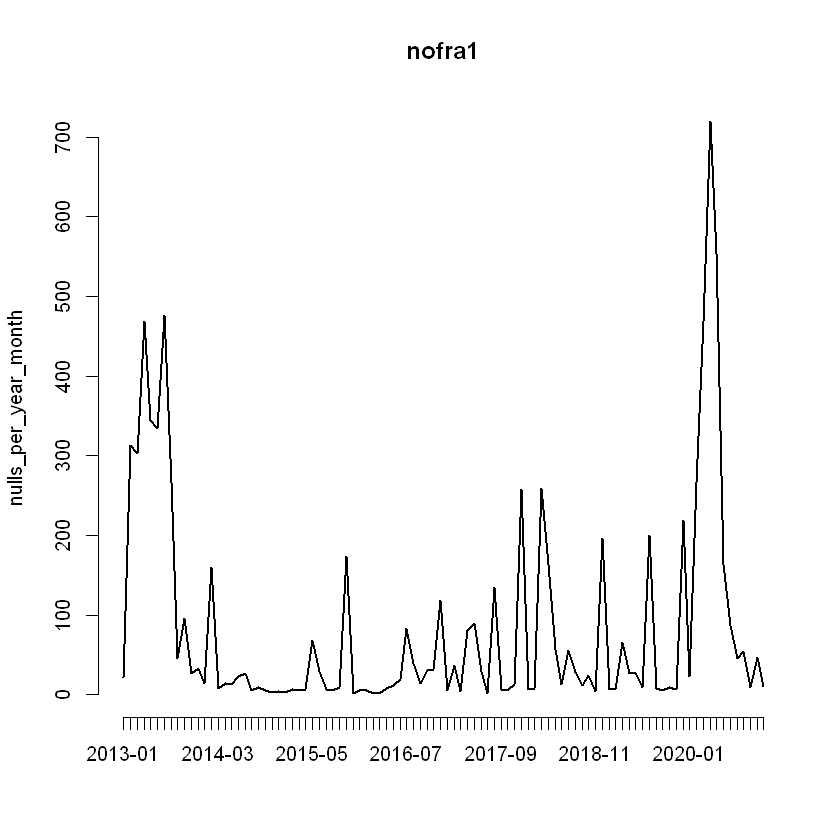

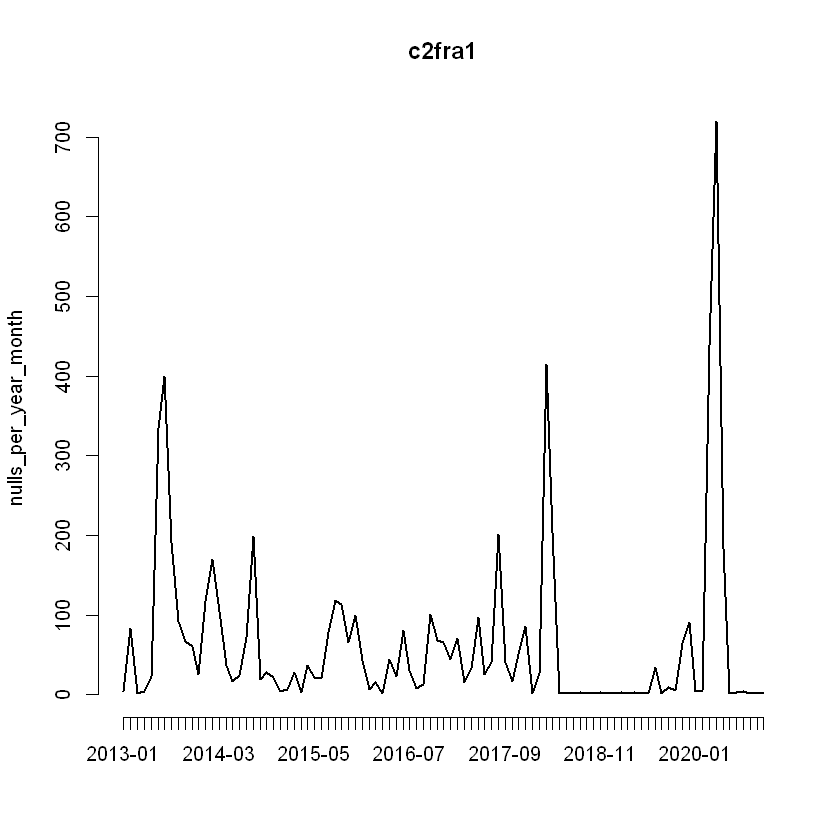

In [18]:
#Aide1 : Apply version for this function ?
#print
for (col_var in colnames(df)[-c(1,3)])
{
    show_var_missing_values(col_var)
}
#plot
for (col_var in colnames(df)[-c(1,3)])
{
    show_var_missing_values(col_var,FALSE)
}

#Aide3 : plot toutes les dates et le nombre de NAs

### Ce code n'est pas utilisé en ce moment, nous le gardons afin de clarifier des doutes : 

In [19]:
#test 

#df_exp<-df
#df_exp$year_month<-df_exp[,"dateheure"]%>%substr(1,7)
#df_exp_na_per_month=df_exp%>%group_by(year_month)%>% summarise(cnt_na_x10=sum(is.na(X10fra1)))
#df_exp_na_per_month

#create_matrix_per_xvar<-function(x_var)
#{
#    df_exp_na_per_month<-df_exp%>%group_by(year_month)%>%summarise(cnt_na=sum(is.na(x_var)))
#    return (df_exp_na_per_month)
#}

#create_na_matrix<-function(datfr)
#{
#    retdf=data.frame()
#    
#    for (col in datfr)
#    {
#        ext_df<-create_matrix_per_xvar(datfr,col)
#        retdf[[col]]<-ext_df[2]
#    }     
#    
#    return (retdf)
#}

#create_na_matrix(df) apply(df_exp,2,create_matrix_per_xvar) create_matrix_per_xvar(df_exp$X10fra1)

##Aide2

##df_exp%>%group_by(year_month)%>%summarise(cnt_na=sum(is.na(X10fra1)))

##df_exp%>%group_by(year_month)%>%summarise(cnt_na=sum(is.na("X10fra1"))) varcol="X10fra1" df_exp%>%group_by(year_month)%>%summarise(cnt_na=sum(is.na(varcol)))




##### Rélation entre les variables

Avec un plot entre différents variables nous essayons de trouvers des correlations. La function "pairs" n'a pas l'air de marcher avec ce volume d'information.

In [20]:
colnames(df)

[1] "X"         "X10fra1"   "dateheure" "tfra1"     "n2fra1"    "hyfra1"   
[7] "nofra1"    "c2fra1"

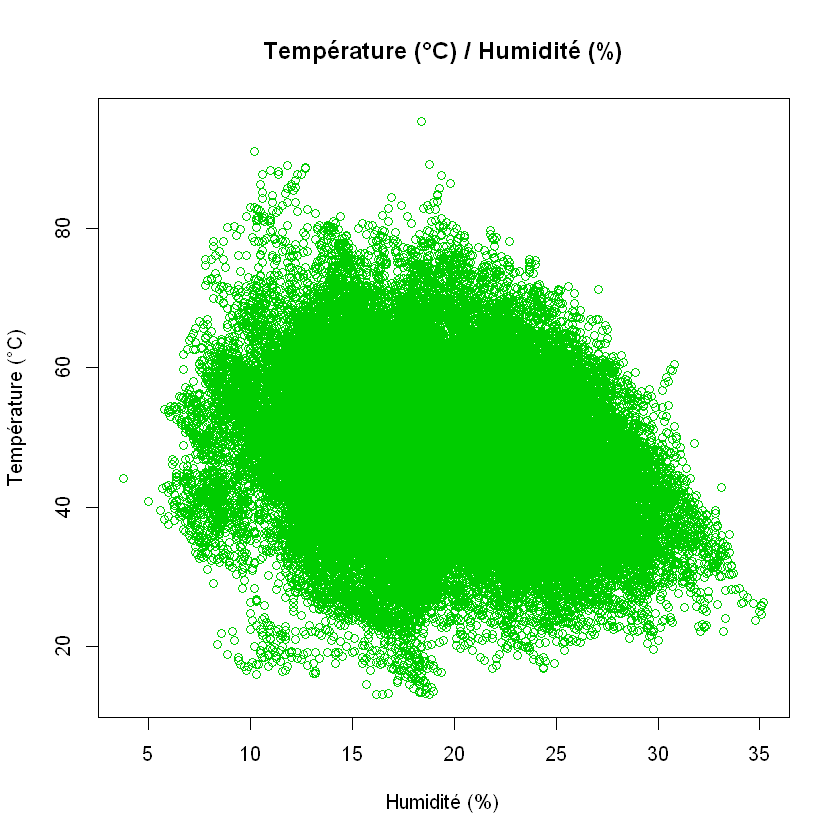

In [21]:
plot(df$tfra1,df$hyfra1,main="Température (°C) / Humidité (%)",col=3,xlab="Humidité (%)",ylab="Température (°C)")

Pas vraiment corrélées, on peut voir peut être que il est plus rare des humidités élévées avec des temératures plus hautes. 

In [22]:
plot_colors=cut(df$hyfra1, breaks = c(-Inf, 30, 50,70,90,+Inf), 
                 labels = c("blue","red","yellow","green","black"), 
                 right = FALSE)

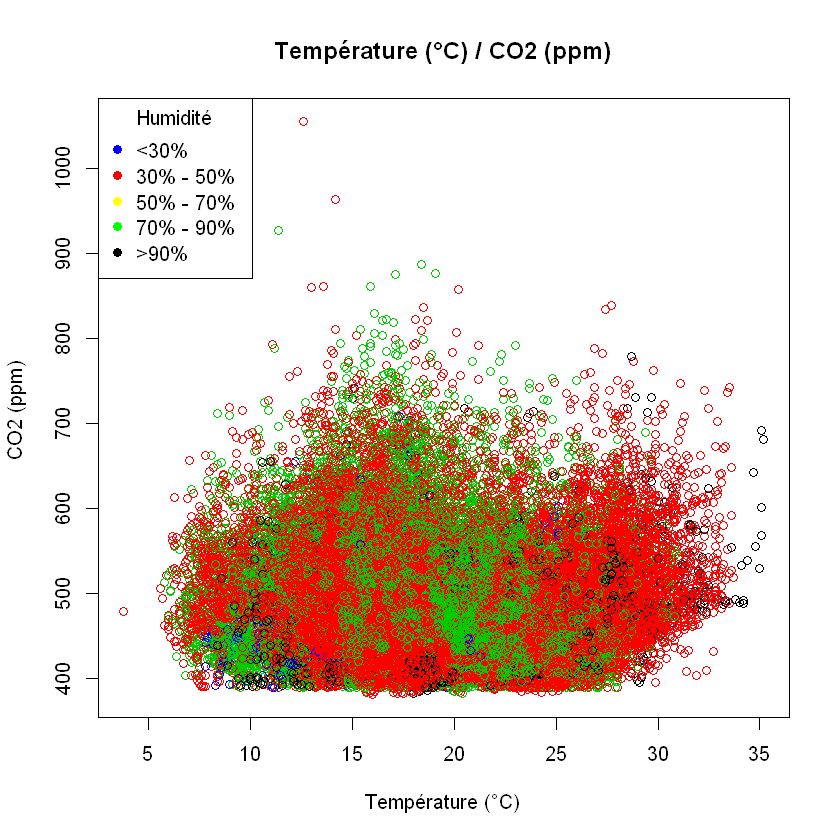

In [23]:
plot(df$tfra1,df$c2fra1,main="Température (°C) / CO2 (ppm)",col=plot_colors,xlab="Température (°C)",ylab="CO2 (ppm) ")
legend(title="Humidité","topleft",legend=c("<30%","30% - 50%","50% - 70%","70% - 90%",">90%"), pch=16, col=levels(plot_colors))

Pas de rélataion apparante entre la température, l'humidité et le CO2. On attendait quand même trouver une rélation ce n'est pas le cas. Regardons avec le NO2 et le NO. 

In [24]:
plot_colors_2=cut(df$nofra1, breaks = c(-Inf, 10, 40,70,100,130,+Inf), 
                 labels = c("blue","red","yellow","green","orange","black"), 
                 right = FALSE)

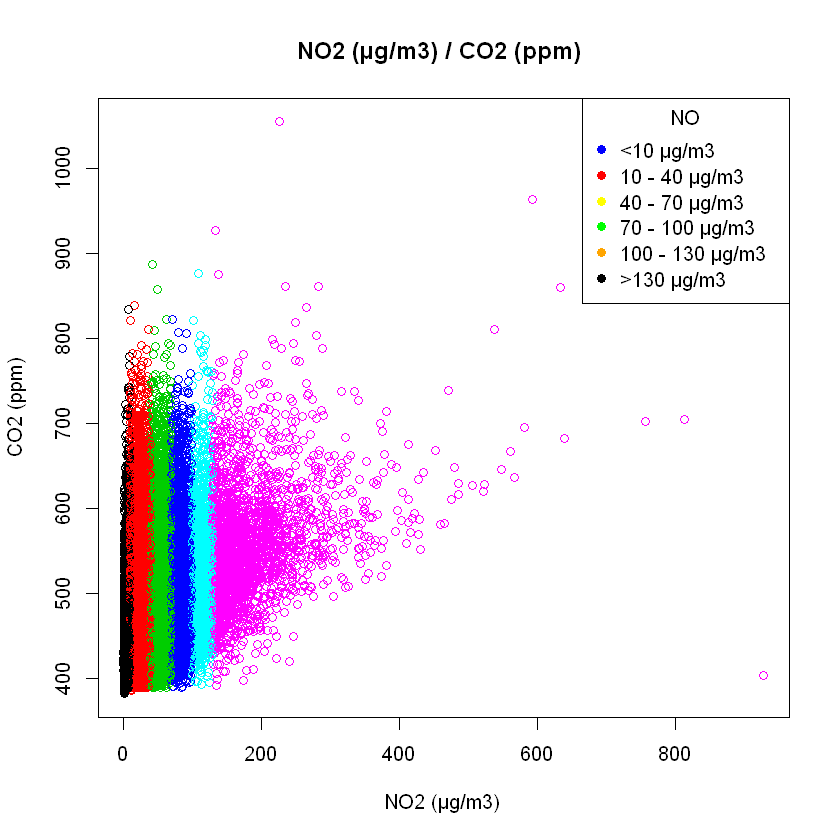

In [25]:
plot(df$nofra1,df$c2fra1,main="NO2 (μg/m3) / CO2 (ppm) ",col=plot_colors_2,xlab="NO2 (μg/m3)",ylab="CO2 (ppm)")
legend(title="NO","topright", legend=c("<10 μg/m3","10 - 40 μg/m3","40 - 70 μg/m3","70 - 100 μg/m3","100 - 130 μg/m3",">130 μg/m3"), pch=16, col=levels(plot_colors_2))

Rélation évidente entre le N2 et NO2 comme prévu, ce n'est pas le cas entre le CO2 et N02, sauf pour les pics extrèmes où les deux sont très élévés. 

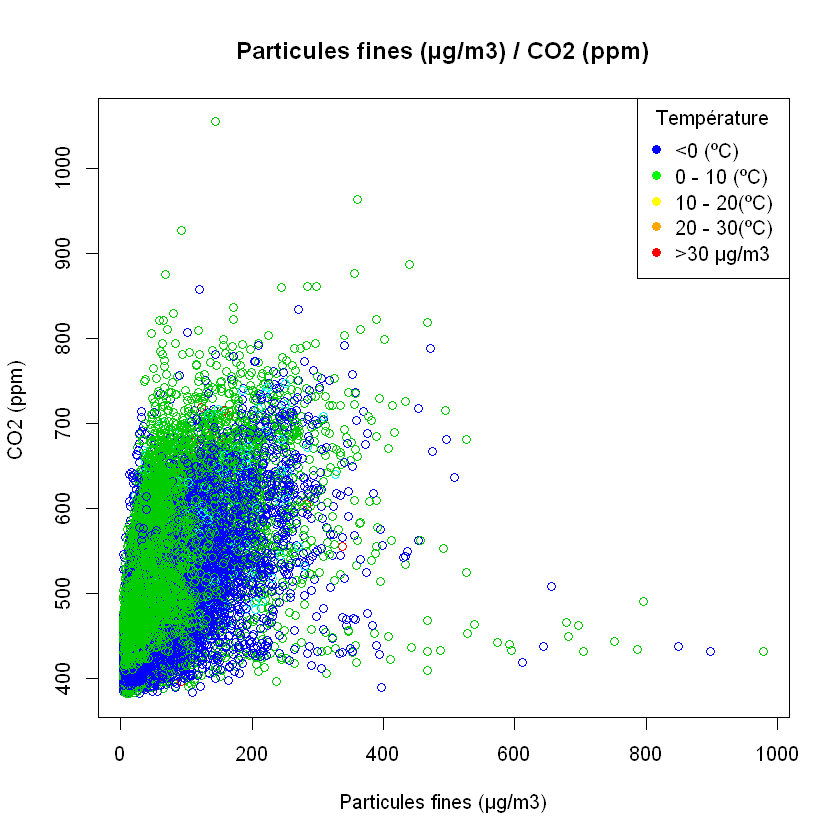

In [38]:
plot_colors_3=cut(df$tfra1, breaks = c(-Inf, 0,10,20,30,+Inf), 
                 labels = c("blue","green","yellow","orange","red"))
plot(df$X10fra1,df$c2fra1,col=plot_colors_3,main="Particules fines (μg/m3) / CO2 (ppm)",xlab="Particules fines (μg/m3)",ylab="CO2 (ppm) ")
legend(title="Température","topright", legend=c("<0 (ºC)","0 - 10 (ºC)","10 - 20(ºC)","20 - 30(ºC)",">30 μg/m3"), pch=16, col=levels(plot_colors_3))

Difficile de trouver une rélation entre les particules fines et les émissions de CO2. Par contre, il semblerait qu'il y a une concentration plus haute de particules fines quand il fait plus froid. Nous créons un plot avec elles.

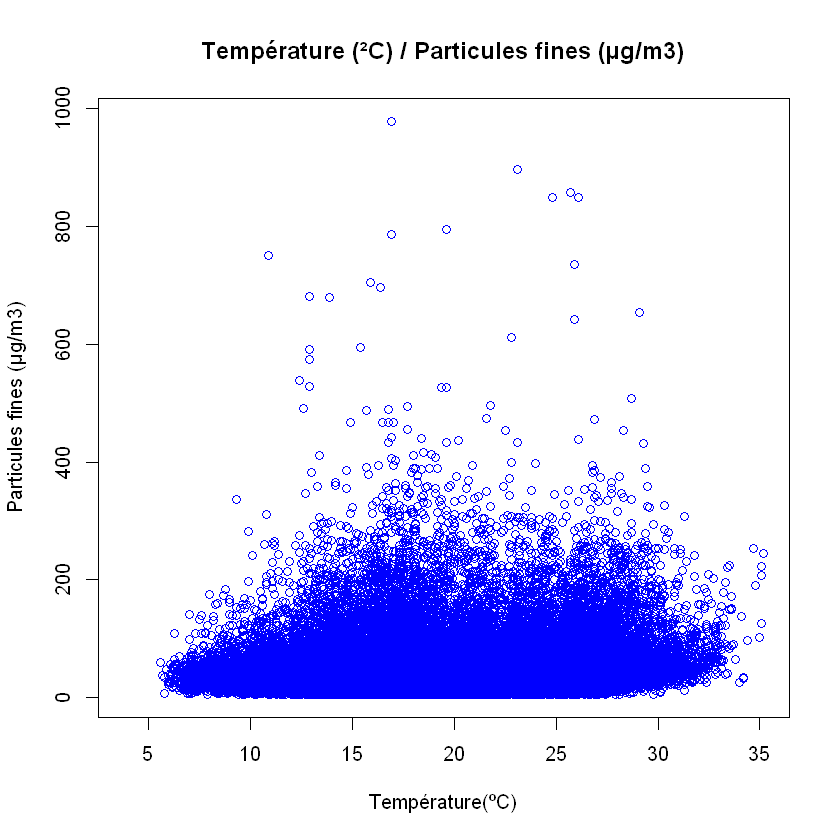

In [37]:
plot(df$tfra1,df$X10fra1,col="blue",main="Température (²C) / Particules fines (μg/m3)",xlab="Température(ºC)",ylab="Particules fines (μg/m3)")

Nous ne constatons pas une rélation évidente. 

## Points à réviser 

1. Mauvais nommes des colonnes. 
2. Les dates et les heures ne correspondent pas avec la version téléchargée sur le site. Le nombre de lignes par année ne correspondent pas non plus.
3. La date du 27/10/2019 est doublé. Ca corresponde avec le changement horaire, donc si on travaille avec des heures locales c'est normal, mais pour les autres années on n'a pas l'heure correspondant au changement horaire doublée. Je me demande si on 2019, le critère d'heure de référence (UTC ou local) aurait changé par rapport aux autres années. Un travail de vérification est nécessaire. 
4. Sauf pour les heures, nous trouvons des données manquantes pour toutes les variables, il faudra décider quoi faire. 
5. NO et NO2 sont trop corrélés, nous n'aurons pas besoin des deux. 

## Aide

1. #Aide1 => apply function pour révision des colonnes. 
2. #Aide2 => groupby avec column name as variable
3. #Aide3 => plot date et count
4. #Aide4 => Mauvauise préséntation si on essaye de faire les deux print et plot pour toutes les colonnes